<a href="https://colab.research.google.com/github/kim-maenghun/Data_Analysis/blob/main/%ED%98%BC%EA%B3%B5%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# W_1

# W_2(JSON)

In [ ]:
d = {"name": "혼자 공부하는 데이터 분석"} # JSON 형식은 키와 값에 큰따옴표를 사용
print(d['name']) # 파이썬은 작은따옴표, 큰따옴표 둘다 가능

혼자 공부하는 데이터 분석


In [ ]:
print(type(d))

<class 'dict'>


In [ ]:
import json

json 패키지에서 파이썬 객체를 JSON 형식에 맞는 텍스트로 바꿀 때는 *json.dumps()* 함수 사용

위에서 만든 딕셔너리 *d* 를 변환하기

In [ ]:
d_str = json.dumps(d, ensure_ascii=False)
print(d_str)

{"name": "혼자 공부하는 데이터 분석"}


*json.dumps()* 함수를 사용할 때 ensure_ascii 매개변수를 *False*로 지정한 이유는 딕셔너리 *d*에 **한글이 포함**되어 있기 때문!

In [ ]:
print(type(d_str))  # 딕셔너리가 문자열로 제대로 바뀌었음

<class 'str'>


웹 기반 API는 전송하려는 파이썬 객체를 JSON 문자열로 변환하여 전송 하여야함.

하지만 JSON 문자열을 파이썬 프로그램에 사용하려면 다시 파이썬 딕셔너리로 바꾸어야함

*json.loads()* 함수를 사용하면 JSON 문자열을 파이썬 객체로 변환 가능

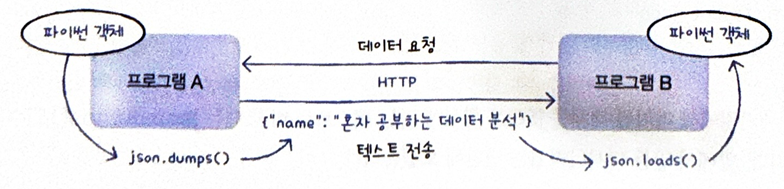

In [ ]:
d2 = json.loads(d_str)
print(d2['name'])

혼자 공부하는 데이터 분석


In [ ]:
print(type(d2)) # 딕셔너리로 변환 완료

<class 'dict'>


조금 더 복잡한 구조도 가능할까?

여러 개의 항목이 들어 있는 딕셔너리나, 딕셔너리 안에 리스트를 포함 할 수 있는지 확인해보기

In [ ]:
d3 = json.loads('{"name": "혼자 공부하는 데이터 분석", "author": "박해선", "year": 2022}')
print(d3['name'])
print(d3['author'])
print(d3['year'])
# (딕셔너리 만들기 > json.dumps()로 문자열 변환 > json.loads()로 파이썬 객체 변환) 이 과정이 너무 번거로우니 JSON 문자열을 json.loads() 함수에 직접 전달

혼자 공부하는 데이터 분석
박해선
2022


더 복잡한 경우를 다루어 보기

*"author"* 키에 여러 항목을 넣어보자.


```
{
    "name": "혼자 공부하는 데이터 분석",
    "author": ["박해선", "홍길동"],
    "year": 2022
}
```
마치 파이썬의 리스트와 비슷하다..



In [ ]:
d3 = json.loads('{"name": "혼자 공부하는 데이터 분석", "author": ["박해선","홍길동"], "year": 2022}')
print(d3['author'][1])

홍길동


딕셔너리 안에 리스트가 중첩된 것

여러 개의 도서를 포함시킬 수 있는 더 복잡한 구조 만들어보기

JSON 객체를 대괄호 안에 나열하면 JSON 배열로 나타낼 수 있다

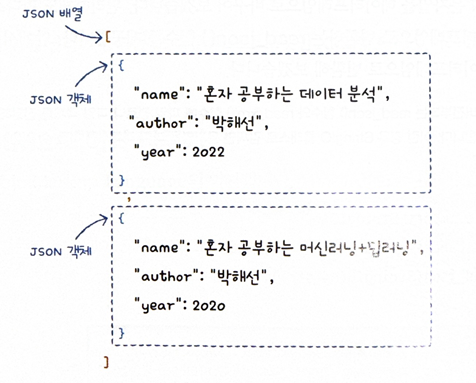

In [ ]:
d4_str = """
[
  {"name": "혼자 공부하는 데이터 분석", "author": "박해선", "year": 2022},
  {"name": "혼자 공부하는 머신러닝+딥러닝", "author": "박해선", "year": 2020}
]
""" # 세겹따옴표를 사용하면 긴 문자열을 줄바꿈하여 입력 가능
d4 = json.loads(d4_str)
print(d4[0]['name'])

혼자 공부하는 데이터 분석


JSON 문자열을 데이터프레임으로 바꾸어 보기

*read_json()* 함수 사용

In [ ]:
from io import StringIO
import pandas as pd
pd.read_json(StringIO(d4_str))

,name,author,year
0,혼자 공부하는 데이터 분석,박해선,2022
1,혼자 공부하는 머신러닝+딥러닝,박해선,2020


JSON을 데이터프레임으로 바꾸는 또 다른 방법은

JSON 문자열을 파이썬 객체로 만든 다음 DataFrame 클래스를 사용



In [ ]:
pd.DataFrame(d4)

,name,author,year
0,혼자 공부하는 데이터 분석,박해선,2022
1,혼자 공부하는 머신러닝+딥러닝,박해선,2020


# W_2(XML)



1.    **XML 문자열을 파이썬 객체로 변환하기: *fromstring()* 함수**





In [ ]:
x_str = """
<book>
    <name>혼자 공부하는 데이터 분석</name>
    <author>박해선</author>
    <year>2022</year>
</book>
"""

*x_str* 은 XML 문자열

In [ ]:
import xml.etree.ElementTree as et
book = et.fromstring(x_str)

In [ ]:
print(type(book)) # 파이썬 객체로 변환 완료

<class 'xml.etree.ElementTree.Element'>


In [ ]:
print(book.tag)

book


book 객체는 *x_str*에서 가장 먼저 등장하는 부모 엘리먼트인 `<book>`에 해당함

book 객체의 tag 속성을 출력하면 엘리먼트 이름을 확인 가능



---



2.   **자식 엘리먼트 확인하기: *findtext()* 메서드**



book 객체를 리스트로 변환하여 자식 엘리먼트 구하기

In [ ]:
book_childs = list(book)
print(book_childs)

[<Element 'name' at 0x7c98877d84f0>, <Element 'author' at 0x7c98877d8540>, <Element 'year' at 0x7c98877d8590>]


*book_childs* 리스트 각 항목을 name, author, year 변수에 할당하고 text 속성으로 엘리먼트에 있는 텍스트 출력

In [ ]:
name, author, year = book_childs
print(name.text)
print(author.text)
print(year.text)

혼자 공부하는 데이터 분석
박해선
2022


**XML은 자식 엘리먼트 순서가 항상 일정하다는 것을 보장하지 않는다.**

위처럼 book_childs에서 순서대로 자식 엘리먼트를 찾는 것은 위험하다.



---

book 객체의 *findtext()* 메서드를 사용하면 해당하는 자식 엘리먼트를 탐색하여 자동으로 텍스트를 반환할 수 있다.

In [ ]:
name = book.findtext('name')
author = book.findtext('author')
year = book.findtext('year')
print(name)
print(author)
print(year)

혼자 공부하는 데이터 분석
박해선
2022


*findtext()* 메서드에 찾으려는 태그 이름을 넣어주면 해당 엘리먼트를 찾아 텍스트를 반환한다.

이 방식은 자식 엘리먼트의 순서가 어떻게 되어 있든지 상관없기 때문에 안전.



---



3.   **조금 더 복잡한 XML 문서 만들어 보기**


두 개의 `<book>` 엘리먼트가 있다면?

JSON과 달리 XML은 배열 같은 구조가 없다. 대신 두 개의 `<book>` 엘리먼트를 감싸는 부모 엘리먼트를 만든다

In [ ]:
x2_str = """
<books>
    <book>
        <name>혼자 공부하는 데이터 분석</name>
        <author>박해선</author>
        <year>2022</year>
    </book>
    <book>
        <name>혼자 공부하는 머신러닝+딥러닝</name>
        <author>박해선</author>
        <year>2020</year>
    </book>
</books>
"""

여기서 *x2_str*의 부모 엘리먼트는 `<books>`가 된다.

*fromstring()* 함수를 사용해 부모 엘리먼트를 확인하면?

In [ ]:
books = et.fromstring(x2_str)
print(books.tag) # 부모 엘리먼트가 books

books




---

4. **여러 개의 자식 엘리먼트 확인하기: findall() 메서드와 for문**

`<books>` 안에 포함된 두 개의 `<book>` 엘리먼트를 찾아서 도서명, 저자, 발행 연도를 출력해보기

동일한 이름을 가진 여러 개의 자식 엘리먼트를 찾을 때는 *findall()* 메서드와 for 문을 함께 사용하면 편리함.

In [ ]:
for book in books.findall('book'): # findall() 메서드는 부모 엘리먼트 안에 있는 자식 엘리먼트를 확인하는 기능 (<book>을 확인)
  name = book.findtext('name')     # 그 안에서 findtext()를 통해 <book> 엘리먼트 안에 있는 자식 엘리먼트 들의 텍스트를 반환
  author = book.findtext('author')
  year = book.findtext('year')
  print(name)
  print(author)
  print(year)
  print()

혼자 공부하는 데이터 분석
박해선
2022

혼자 공부하는 머신러닝+딥러닝
박해선
2020



 +pd.read_xml()을 이용하면 JSON 처럼 XML을 바로 데이터프레임으로 변환해 줌.

# W_2(API로 도서찾기)

*requests* 패키지를 사용해 파이썬에서 URL을 호출하여 데이터 받기

In [ ]:
import requests

호출 URL을 변수에 저장

In [ ]:
url = "http://data4library.kr/api/loanItemSrch?format=json&startDt= \
2021-04-01&endDt=2021-04-30&age=20&authKey=09551dfbf7692c51a3ec4bcd67dd234bfac41da80ccb295c49d647b9b4edee2a"

이 URL은 HTTP GET 방식으로 파라미터 값을 전달 하기 때문에 URL을 *requests.get()* 함수에 전달

In [ ]:
r = requests.get(url)

*get()*함수가 반환하는 값은 API 호출의 결과를 담고 있는 requests 패키지의 Response 클래스 객체이다.

이 객체는 유용한 여러 메서드를 제공한다.

*json()* 메서드는 편리하게 웹 서버로부터 받은 JSON 문자열을 파이썬 객체로 변환하여 반환한다.

In [ ]:
data = r.json()
print(data)

{'response': {'error': 'API 활성화 상태가아닙니다.'}}


파이썬으로 공개 API를 호출해서 데이터를 받아냈다!

이제 데이터를 적절히 변형하여 보기 좋은 형태로 만들어 보자.

---

코랩or주피터는 *print()* 함수를 사용하지 않아도 코드 셀의
마지막 라인의 실행 결과를 자동으로 출력해줌

그래서 코드 셀에 변수 이름만 써도 변수에 담긴 내용이 출력된다.

더욱이 JSON 형식이라면 들여쓰기가 잘 되어 보기 쉬운 형태로 바꾸어 주기까지 한다.

In [ ]:
data

{'response': {'error': 'API 활성화 상태가아닙니다.'}}

doc 키에 매핑된 딕셔너리에 실제 도서 정보들이 들어있다.

이 JSON 데이터를 판다스 데이터프레임으로 손쉽게 변환하기 위해 data 딕셔너리의 구조를 다음과 같이 바꿔준다.

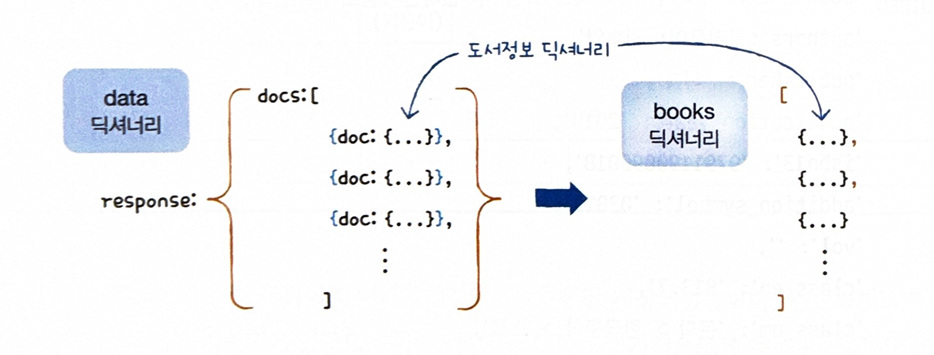

이렇게 만들기 위해 data['respone']['docs']에 매핑된 리스트를

순회하면서 doc 키에 매핑된 딕셔너리를 추출한 후 빈 리스트에 추가할 것. (for문 사용)

In [ ]:
books = []
for d in data['response']['docs']:   # data['response']['docs'] 안에 있는 것들을 하나씩 꺼내서, d라고 부르자
  books.append(d['doc'])        # 꺼낸 d에서 'doc' 값을 꺼내서 books 리스트에 넣는다.

KeyError: 'docs'

books 변수에 원하는 대로 저장되었는지 확인.

In [ ]:
books

<Element 'books' at 0x7c9887673600>

제대로 저장되었다면 판다스 DataFrame 클래스에 이 리스트를 넘기자.

In [ ]:
books_df = pd.DataFrame(books)
books_df

인기 도서 목록이 데이터프레임의 각 행에 잘 저장되었으니

books_df의 내용을 JSON으로 변환하여 저장하자.

1-3절에서 판다스 데이터프레임을 CSV 파일로 저장하기 위한 to_csv() 메서드를 배웠는데

비슷하게 JSON 파일로 저장해 주는 *to_json()* 메서드가 있다

In [ ]:
books_df.to_json('20s_best_book.json')

# **W_3(검색 결과 페이지 가져오기)**

Yes24 사이트에서 검색 결과 페이지 HTML을 가져와 보자.

이전 절에서 저장해 놓았던 20대가 가장 좋아하는 도서 목록을 사용

*gdown* 패키지를 사용해 코랩에 다운로드 한다.

In [ ]:
import gdown
gdown.download('https://bit.ly/3q9SZix', '20s_best_book.json', quiet=False)

Downloading...
From: https://bit.ly/3q9SZix
To: /content/20s_best_book.json
100%|██████████| 92.9k/92.9k [00:00<00:00, 13.6MB/s]


'20s_best_book.json'

판다스 데이터프레임으로 불러 온 후 head() 메서드로 처음 다섯 개 행을 출력

In [ ]:
import pandas as pd
books_df = pd.read_json('20s_best_book.json')
books_df.head()

,no,ranking,bookname,authors,publisher,publication_year,isbn13,addition_symbol,vol,class_no,class_nm,loan_count,bookImageURL
0,1,1,우리가 빛의 속도로 갈 수 없다면 :김초엽 소설,지은이: 김초엽,허블,2019,9791190090018,03810,,813.7,문학 > 한국문학 > 소설,461,https://image.aladin.co.kr/product/19359/16/co...
1,2,2,달러구트 꿈 백화점.이미예 장편소설,지은이: 이미예,팩토리나인,2020,9791165341909,03810,,813.7,문학 > 한국문학 > 소설,387,https://image.aladin.co.kr/product/24512/70/co...
2,3,3,지구에서 한아뿐 :정세랑 장편소설,지은이: 정세랑,난다,2019,9791188862290,03810,,813.7,문학 > 한국문학 > 소설,383,https://image.aladin.co.kr/product/19804/82/co...
3,4,4,"시선으로부터, :정세랑 장편소설",지은이: 정세랑,문학동네,2020,9788954672214,03810,,813.7,문학 > 한국문학 > 소설,370,https://image.aladin.co.kr/product/24131/37/co...
4,5,5,아몬드 :손원평 장편소설,지은이: 손원평,창비,2017,9788936434267,03810,,813.7,문학 > 한국문학 > 소설,365,http://image.aladin.co.kr/product/16839/4/cove...


books_df 데이터프레임은 열이 많아서 한눈에 다 안들어온다.

이 데이터프레임에서 'no'열 부터 'isbn13'열까지만 선택해서 새로운 데이터프레임을 만들자.

In [ ]:
books = books_df[['no','ranking','bookname','authors','publisher','publication_year','isbn13']]
books.head()

,no,ranking,bookname,authors,publisher,publication_year,isbn13
0,1,1,우리가 빛의 속도로 갈 수 없다면 :김초엽 소설,지은이: 김초엽,허블,2019,9791190090018
1,2,2,달러구트 꿈 백화점.이미예 장편소설,지은이: 이미예,팩토리나인,2020,9791165341909
2,3,3,지구에서 한아뿐 :정세랑 장편소설,지은이: 정세랑,난다,2019,9791188862290
3,4,4,"시선으로부터, :정세랑 장편소설",지은이: 정세랑,문학동네,2020,9788954672214
4,5,5,아몬드 :손원평 장편소설,지은이: 손원평,창비,2017,9788936434267


한눈에 잘 들어오도록 바꾸었다! 하지만 일곱 개나 되는 열 이름을 모두 쓰는 건 번거롭다.

선택해야 할 열이 더 많다면 아주 귀찮은 일이다.

더욱이 열 이름을 하나라도 잘못 쓰면 오류가 발생한다.



---
**데이터프레임 행과 열 선택하기: loc 메서드**


판다스가 제공하는 loc 메서드를 사용하면 원하는 행과 열을 조금 더 쉽게 선택할 수 있다.

loc는 메서드이지만 대괄호를 사용하여 행의 목록과 열의 목록을 받는다.

In [ ]:
books_df.loc[[0,1], ['bookname','authors']]

,bookname,authors
0,우리가 빛의 속도로 갈 수 없다면 :김초엽 소설,지은이: 김초엽
1,달러구트 꿈 백화점.이미예 장편소설,지은이: 이미예


더욱 편리한 것은 리스트 대신 슬라이스 연산자(:)를 쓸 수도 있다.

In [ ]:
books_df.loc[0:1, 'bookname':'authors']

,bookname,authors
0,우리가 빛의 속도로 갈 수 없다면 :김초엽 소설,지은이: 김초엽
1,달러구트 꿈 백화점.이미예 장편소설,지은이: 이미예


하지만 loc 메서드의 슬라이싱은 파이썬의 슬라이싱과 다르게 마지막 항목도 포함한다.

---

시작과 끝을 지정하지 않고 슬라이스 연산자를 사용하면 전체를 의미한다.

따라서 전체 행과 'no'열에서 'isbn13'열까지 선택하는 코드를 다음처럼 쓸 수 있다.

In [ ]:
books = books_df.loc[:, 'no':'isbn13']
books.head()

,no,ranking,bookname,authors,publisher,publication_year,isbn13
0,1,1,우리가 빛의 속도로 갈 수 없다면 :김초엽 소설,지은이: 김초엽,허블,2019,9791190090018
1,2,2,달러구트 꿈 백화점.이미예 장편소설,지은이: 이미예,팩토리나인,2020,9791165341909
2,3,3,지구에서 한아뿐 :정세랑 장편소설,지은이: 정세랑,난다,2019,9791188862290
3,4,4,"시선으로부터, :정세랑 장편소설",지은이: 정세랑,문학동네,2020,9788954672214
4,5,5,아몬드 :손원평 장편소설,지은이: 손원평,창비,2017,9788936434267


---
**검색 결과 페이지 HTML 가져오기: requests.get() 함수**

requests 패키지를 임포트하고 *requests.get* 함수로 첫 번째 도서에 대한 검색 결과 페이지 HTML 가져오기

첫 번째 도서의 ISBN과 Yes24 검색 결과 페이지 URL을 위한 변수를 정의한다.

requests.get() 함수를 호출할 때 파이썬 문자열의 format() 메서드를 사용해 isbn 변수에 저장된 값을 url 변수에 전달한다.

In [ ]:
import requests
isbn = 9791190090018
url = 'http://www.yes24.com/Product/Search?domain=BOOK&query={}'
r = requests.get(url.format(isbn))

In [ ]:
print(r.text)






	<!DOCTYPE html >
	<html lang="ko">

<head>
	<meta http-equiv="X-UA-Compatible" content="IE=Edge" />
	<meta http-equiv="Content-Type" content="text/html;charset=utf-8" />
	<meta http-equiv="Accept-CH" content="dpr, width, viewport-width, rtt, downlink, ect, UA, UA-Platform, UA-Arch, UA-Model, UA-Mobile, UA-Full-Version" />
	<meta http-equiv="Accept-CH-Lifetime" content="86400" />
	<meta name="referrer" content="unsafe-url" />
	<meta name="viewport" content="width=1170" />

	<title> 9791190090018 - 예스24</title> 

	<meta name="title" content="예스24" />
	<meta name="description" content="YOUR EVERY STORY 문화 콘텐츠 플랫폼, 예스24" />
	<meta name="keywords" content="인터넷 서점, 온라인 쇼핑, 상품 추천, 쇼핑몰, 상품 검색, 도서 정보, 국내도서, 외국도서, 전자책, eBook, 이북, 크레마, 공연, 콘서트, 뮤지컬, 음반, 예매, DVD, 블루레이, 예스24, YES24, 교보문고, 알라딘, 리센스, 예스24 도서용품, 친환경 PB 브랜드, 사은품, 굿즈" />


	<link title="YES24" rel="search" type="application/opensearchdescription+xml" href="//www.yes24.com/OpensearchDescription.xml">

	<script type="text/javascript



---
# **W_3(HTML에서 데이터 추출하기: 뷰티플수프)**




HTML에서 상세 페이지 링크의 위치를 찾았으니 이제 본격적으로 뷰티플수프를 사용

뷰티플수프 패키지에서 BeautifulSoup 클래스를 임포트

In [ ]:
from bs4 import BeautifulSoup

그다음 이 클래스의 객체를 생성, 첫 번째 매개변수는 **파싱** 할 HTML 문서이고 두번째는 파싱에 사용할 **서퍼** 이다.

In [ ]:
soup = BeautifulSoup(r.text, 'html.parser')

태그 위치 찾기: *find()* 메서드

In [ ]:
prd_link = soup.find('a', attrs={'class':'gd_name'})

In [ ]:
print(prd_link)

<a class="gd_name" href="/product/goods/74261416" onclick="wiseLogV2('S', '101_005_003_001', ''); setGoodsClickExtraCodeHub('032', '9791190090018', '74261416', '0',this);">우리가 빛의 속도로 갈 수 없다면</a>


prd_link를 딕셔너리처럼 사용해 태그 안의 속성을 참조할 수 있다.

이 방법으로 링크 주소인 href 속성의 값을 얻을 수 있다.

In [ ]:
print(prd_link['href'])

/product/goods/74261416


Yes24의 검색 결과 페이지에서 도서의 상세 페이지로 넘어가는 링크를 찾았다!

이 주소가 있다면 다시 requests.get() 함수를 사용하여 쪽수가 담긴 상세 페이지 HTML을 가져올 수 있다.



---

**도서 상세 페이지 HTML 가져오기**

상세 페이지 주소를 만들어 requests.get() 함수를 호출해 보자.

In [ ]:
# '우리가 빛의 속도로 갈 수 없다면'의 상세 페이지 가져오기
url = 'http://www.yes24.com'+prd_link['href']
r = requests.get(url)

In [ ]:
print(r.text)








	<!DOCTYPE html >
	<html lang="ko">

<head><link rel="canonical" href="https://www.yes24.com/product/goods/74261416">
	<meta http-equiv="X-UA-Compatible" content="IE=Edge" />
	<meta http-equiv="Content-Type" content="text/html;charset=utf-8" />
	<meta http-equiv="Accept-CH" content="dpr, width, viewport-width, rtt, downlink, ect, UA, UA-Platform, UA-Arch, UA-Model, UA-Mobile, UA-Full-Version" />
	<meta http-equiv="Accept-CH-Lifetime" content="86400" />
	<meta name="referrer" content="unsafe-url" />
	<meta name="viewport" content="width=1170" />

	<title>우리가 빛의 속도로 갈 수 없다면 - 예스24 </title> 

	
<meta name="title" content="우리가 빛의 속도로 갈 수 없다면"/>
<meta name="author" content="김초엽 저" />
	
<meta name="description" content="김초엽 저. 허블. 판매가 12,600원(10% 할인). 포인트 700원(5% 적립). 2019년 서울국제도서전 〈여름, 첫 책〉으로 처음 독자와 만난 후, 중국 양대 SF문학상인 〈은하상〉과 〈중국성운상〉을 수상하는 등 국경을 넘어 전 세계 독자를 만나온 김..."/>
	
<meta name="keywords" content="해외문학상_우리작가,예스리커버,월간개발자_추천도서,YES24XEBS_대국민독서챌린지,크레마클럽에있어요,2020젊은작가TOP5,최신작알림신청인기작가,20

뷰티플수프 객체를 생성하고 find() 메서드로 품목정보 `<div> `태그를 찾아서 출력하자

In [ ]:
soup = BeautifulSoup(r.text, 'html.parser')
prd_detail = soup.find('div', attrs={'id':'infoset_specific'})
print(prd_detail)

<div class="gd_infoSet infoSet_noLine" id="infoset_specific">
<div class="tm_infoSet">
<h4 class="tit_txt">품목정보</h4>
</div>
<div class="infoSetCont_wrap">
<div class="yesTb">
<table class="tb_nor tb_vertical" summary="품목정보 국내도서, 외국도서 " width="100%">
<caption>품목정보</caption>
<colgroup>
<col width="170"/>
<col width="*"/>
</colgroup>
<tbody class="b_size">
<tr>
<th class="txt" scope="row">발행일</th>
<td class="txt lastCol">2019년 06월 24일</td>
</tr>
<tr>
<th class="txt" scope="row">쪽수, 무게, 크기</th>
<td class="txt lastCol">330쪽 | 496g | 130*198*30mm</td>
</tr>
<tr>
<th class="txt" scope="row">ISBN13</th>
<td class="txt lastCol">9791190090018</td>
</tr>
<tr>
<th class="txt" scope="row">ISBN10</th>
<td class="txt lastCol">1190090015</td>
</tr>
</tbody>
</table>
</div>
</div>
<script type="text/javascript">
        if ($("#infoset_specific table tbody tr").length == 0) {
            $("#infoset_specific").remove();
        }
    </script>
</div>


앞서 찾은 `<div>` 태그 안에 다음과 같은 품목정보 테이블이 들어 있다.

이 테이블에서 ‘쪽수, 무게, 크기’에 해당하는 행인 <tr> 태그를 찾아 <td> 태그 안에 있는 텍스트를 가져오면 된다.

품목정보 테이블의 행의 하나씩을 검사해서 '쪽수, 무게, 크기'에 해당하는 `<tr>` 태그를 찾아야 한다.

뷰티플수프의 find_all() 메서드를 사용하면 특정 HTML 태그를 모두 찾아서 리스트로 반환해 준다.

In [ ]:
prd_tr_list = prd_detail.find_all('tr')
print(prd_tr_list)

[<tr>
<th class="txt" scope="row">발행일</th>
<td class="txt lastCol">2019년 06월 24일</td>
</tr>, <tr>
<th class="txt" scope="row">쪽수, 무게, 크기</th>
<td class="txt lastCol">330쪽 | 496g | 130*198*30mm</td>
</tr>, <tr>
<th class="txt" scope="row">ISBN13</th>
<td class="txt lastCol">9791190090018</td>
</tr>, <tr>
<th class="txt" scope="row">ISBN10</th>
<td class="txt lastCol">1190090015</td>
</tr>]


**태그 안의 텍스트 가져오기: get_text() 메서드**

`<tr>` 태그를 리스트로 추출하고 나면 다음 작업은 간단하다

for 문으로 prd_tr_list를 순회하면서 `<th>` 태그 안의 텍스트가 '쪽수, 무게, 크기'에 해당하는지 검사한다.

원하는 행을 찾는다면 `<td>` 태그 안에 담긴 텍스트를 page_td 변수에 저장한다.

`<td>` 안에 있는 텍스트를 가져오려면  Tag 객체의 get_text() 메서드를 사용한다.

In [ ]:
for tr in prd_tr_list:
  if tr.find('th').get_text() == '쪽수, 무게, 크기':
    page_td = tr.find('td').get_text()
    break

In [ ]:
print([page_td])

['330쪽 | 496g | 130*198*30mm']


split() 메서드를 호출하면 공백을 기준으로 문자열을 나누어 리스트로 반환해준다.

In [ ]:
print(page_td.split()[0])

330쪽


---
# **W_3(전체 도서의 쪽수 구하기)**

In [ ]:
def get_page_cnt(isbn):
  # YES24 도서 검색 페이지 URL
  url = 'http://www.yes24.com/Product/Search?domain=BOOK&query={}'
  # url에 ISBN을 넣어 HTML 가져오기
  r = requests.get(url.format(isbn))
  soup = BeautifulSoup(r.text, 'html.parser') #HTML 파싱
  # 검색 결과에서 해당 도서를 선택한다.
  prd_info = soup.find('a', attrs={'class':'gd_name'})
  if prd_info == None:
    return ''
  # 도서 상세 페이지를 가져오기
  url = 'http://www.yes24.com'+prd_info['href']
  r = requests.get(url)
  soup = BeautifulSoup(r.text, 'html.parser')
  # 품목정보 <div>를 선택한다.
  prd_detail = soup.find('div', attrs={'id':'infoset_specific'})
  # 테이블에 있는 <tr> 태그를 가져온다.
  prd_tr_list = prd_detail.find_all('tr')
  # 쪽수가 들어 있는 <th>를 찾아 <td>에 담긴 값을 반환한다.
  for tr in prd_tr_list:
    if tr.find('th').get_text() == '쪽수, 무게, 크기':
      return tr.find('td').get_text().split()[0]
  return ''

첫 번째 도서의 ISBN을 넣어 함수 테스트 하기

In [ ]:
get_page_cnt(9791190090018)

'330쪽'



---
가장 인기 있는 10권의 도서 쪽수 가져오기 head() 함수 이용


In [ ]:
top10_books = books.head(10)

top10_books의 각 행에 get_page_cnt() 함수를 적용하기

각 행의 반복 작업을 수행하기 위해서 데이터프레임은 apply()메서드를 제공 한다.

apply() 메서드의 첫 번째 매개변수는 실행할 함수이다.

In [ ]:
def get_page_cnt2(row):
  isbn = row['isbn13']
  return get_page_cnt(isbn)

새로 만든 get_page_cnt2() 함수를 apply() 메서드에 다음과 같이 사용한다.



여기서는 각 행에 함수를 적용해야 하므로 axis 매개변수를 1로 지정한다. 기본값인 0을 지정하면 각 열에 대해 함수를 적용한다

In [ ]:
page_count = top10_books.apply(get_page_cnt2, axis=1)
print(page_count)

0    330쪽
1    300쪽
2    228쪽
3    340쪽
4    264쪽
5    396쪽
6    272쪽
7    456쪽
8    244쪽
9    296쪽
dtype: object


**데이터프레임과 시리즈 합치기: merge() 함수**

page_count 시리즈 객체를 top10_books 데이터프레임의 열로 합쳐보자

page_count 시리즈 객체에 이름을 지정해준다. 이 이름은 top10_books 데이터프레임에 추가될 때 열 이름으로 사용된다.

시리즈 객체의 name 속성을 사용하면 이름을 간단하게 지정할 수 있다.

In [ ]:
page_count.name = 'page_count'
print(page_count)

0    330쪽
1    300쪽
2    228쪽
3    340쪽
4    264쪽
5    396쪽
6    272쪽
7    456쪽
8    244쪽
9    296쪽
Name: page_count, dtype: object


두 데이터프레임 합치기

In [ ]:
top10_with_page_count = pd.merge(top10_books, page_count, left_index=True, right_index=True)
top10_with_page_count

,no,ranking,bookname,authors,publisher,publication_year,isbn13,page_count
0,1,1,우리가 빛의 속도로 갈 수 없다면 :김초엽 소설,지은이: 김초엽,허블,2019,9791190090018,330쪽
1,2,2,달러구트 꿈 백화점.이미예 장편소설,지은이: 이미예,팩토리나인,2020,9791165341909,300쪽
2,3,3,지구에서 한아뿐 :정세랑 장편소설,지은이: 정세랑,난다,2019,9791188862290,228쪽
3,4,4,"시선으로부터, :정세랑 장편소설",지은이: 정세랑,문학동네,2020,9788954672214,340쪽
4,5,5,아몬드 :손원평 장편소설,지은이: 손원평,창비,2017,9788936434267,264쪽
5,6,6,피프티 피플 :정세랑 장편소설,지은이: 정세랑,창비,2016,9788936434243,396쪽
6,7,7,목소리를 드릴게요 :정세랑 소설집,지은이: 정세랑,아작,2020,9791165300005,272쪽
7,8,8,나미야 잡화점의 기적 :히가시노 게이고 장편소설,지은이: 히가시노 게이고 ;옮긴이: 양윤옥,현대문학,2012,9791167901484,456쪽
8,9,9,선량한 차별주의자,김지혜 지음,창비,2019,9788936477196,244쪽
9,10,9,쇼코의 미소 :최은영 소설,지은이: 최은영,문학동네,2016,9788954641630,296쪽




---
혹시 8번도서의 isbn을 바꿀 수 있을까?


In [ ]:
top10_books

,no,ranking,bookname,authors,publisher,publication_year,isbn13
0,1,1,우리가 빛의 속도로 갈 수 없다면 :김초엽 소설,지은이: 김초엽,허블,2019,9791190090018
1,2,2,달러구트 꿈 백화점.이미예 장편소설,지은이: 이미예,팩토리나인,2020,9791165341909
2,3,3,지구에서 한아뿐 :정세랑 장편소설,지은이: 정세랑,난다,2019,9791188862290
3,4,4,"시선으로부터, :정세랑 장편소설",지은이: 정세랑,문학동네,2020,9788954672214
4,5,5,아몬드 :손원평 장편소설,지은이: 손원평,창비,2017,9788936434267
5,6,6,피프티 피플 :정세랑 장편소설,지은이: 정세랑,창비,2016,9788936434243
6,7,7,목소리를 드릴게요 :정세랑 소설집,지은이: 정세랑,아작,2020,9791165300005
7,8,8,나미야 잡화점의 기적 :히가시노 게이고 장편소설,지은이: 히가시노 게이고 ;옮긴이: 양윤옥,현대문학,2012,9788972756194
8,9,9,선량한 차별주의자,김지혜 지음,창비,2019,9788936477196
9,10,9,쇼코의 미소 :최은영 소설,지은이: 최은영,문학동네,2016,9788954641630


In [ ]:
top10_books.loc[7,'isbn13'] = 9791167901484

# **W_4(열 삭제하기)**

In [ ]:
import gdown
gdown.download('https://bit.ly/3RhoNho', 'ns_202104.csv', 'quiet=False')

'ns_202104.csv'

판다스 데이터프레임으로 읽어서 처음 다섯 개 행을 출력

In [ ]:
import pandas as pd
ns_df = pd.read_csv('ns_202104.csv', low_memory=False)
ns_df.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자,Unnamed: 13
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19,NaN
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19,NaN
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19,NaN
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19,NaN
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19,NaN


마지막 열은 csv 파일 각 라인 끝에 콤마가 있기 때문에 자동으로 추가된 것,  삭제하자

In [ ]:
ns_book = ns_df.loc[:, '번호':'등록일자']
ns_book.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19




---

**loc 메서드와 불리언 배열**

열의 개수가 많은 데이터프레임의 사용할 열을 불리언 배열로 나타내려면 `[True,True,False~~~]`
처럼 일일이 불리언 값을 나열하여야 하므로 굉장히 귀찮다.

조금 더 편리한 방법에 대해 알아보자.

먼저 데이터프레임 열 이름이 저장된 columns 속성을 확인해 보자.

In [ ]:
print(ns_df.columns)

Index(['번호', '도서명', '저자', '출판사', '발행년도', 'ISBN', '세트 ISBN', '부가기호', '권',
       '주제분류번호', '도서권수', '대출건수', '등록일자', 'Unnamed: 13'],
      dtype='object')


columns 속성은 판다스의 **Index 클래스** 객체이다. 이 객체의 원소는 파이썬의 리스트 처럼 숫자 인덱스로 참조할 수 있다.

예를 들어 첫번째 열 이름인 '번호'를 선택하려면 다음과 같이 쓸 수 있다.

In [ ]:
print(ns_df.columns[0])

번호


Index 클래스를 비롯하여 판다스 배열 성격의 객체는 어떤 값과 비교할 때 자동으로 배열에 있는 모든 원소와 하나씩 비교해준다.
이를 원소별 비교라고 한다.

원소별 비교를 활용하여 ns_df.columns에서 ‘Unnamed:13’ 열이 아닌 것을 표시하는 배열을 만들면?

In [ ]:
ns_df.columns != 'Unnamed: 13'

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True, False])

(!=는 비교연산자) 이렇게 반환된 결과는 넘파이 배열이다.

원소별 비교 연산으로 얻은 불리언 배열을 selected_columns 변수에 저장하고 판다스 데이터프레임의 loc 메서드에 전달하면 True인 열의 행만 선택할 수 있다.

In [ ]:
selected_columns = ns_df.columns != 'Unnamed: 13'
ns_book = ns_df.loc[:, selected_columns]
ns_book.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


이번에는 '부가기호' 열을 제외해 보자.

In [ ]:
selected_columns = ns_df.columns != '부가기호'
ns_book = ns_df.loc[:, selected_columns]
ns_book.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,권,주제분류번호,도서권수,대출건수,등록일자,Unnamed: 13
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,1,0,2021-03-19,NaN
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,1,0,2021-03-19,NaN
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,1,0,2021-03-19,NaN
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,1,0,2021-03-19,NaN
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,1,0,2021-03-19,NaN




---
**drop() 메서드**


이번에는 데이터프레임의 메서드를 사용하여 열을 삭제해 보자.

판다스에서는 데이터프레임의 행이나 열을 삭제하는 **drop() 메서드**를 제공한다.

drop() 메서드로 열을 삭제하려면 첫 번째 매개변수에 삭제하려는 열 이름을 전달하고 axis 매개변수를 1로 지정한다.

(axis를 0으로 지정하면 행, 1로 지정하면 열)

In [ ]:
ns_book = ns_df.drop('Unnamed: 13', axis=1)
ns_book.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


또한 drop() 메서드는 첫 번째 매개변수에 제외할 열 이름을 리스트 형식으로 여러 개 지정할 수 있다.

In [ ]:
ns_book = ns_df.drop(['부가기호','Unnamed: 13'], axis=1)
ns_book.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,1,0,2021-03-19


지금까지는 ns_df 데이터프레임에서 열을 삭제한 결과를 ns_book이라는 변수에 저장했는데

drop() 메서드에 inplace 매개변수를 True로 지정하면 현재 선택한 데이터프레임을 바로 수정할 수도 있다.

ns_book 데이터프레임의 ‘주제분류번호’ 열을 삭제해 보자. (inplace=True = 선택한 데이터프레임에 덮어쓴다.)

In [ ]:
ns_book.drop('주제분류번호', axis=1, inplace=True)
ns_book.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,권,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,1,0,2021-03-19




---

**dropna() 메서드**

판다스는 비어있는 값을 NaN으로 표시한다. drop() 메서드와 비슷한 dropna() 메서드는
기본적으로 NaN이 하나 이상 포함된 행이나 열을 삭제한다.

ns_df 데이터프레임에서 NaN이 포함된 열을 삭제해 보자.

In [ ]:
ns_book = ns_df.dropna(axis=1)
ns_book.head()

,번호,ISBN,도서권수,대출건수,등록일자
0,1,9788937444319,1,0,2021-03-19
1,2,9791190123969,1,0,2021-03-19
2,3,9788968332982,1,0,2021-03-19
3,4,9788970759906,1,0,2021-03-19
4,5,9788934990833,1,0,2021-03-19


필요한 열 까지 삭제가 되어버렸다.

모든 값이 NaN인 열을 삭제하려면 dropna() 메서드에 how 매개변수를 ‘all’로 지정하면 된다.

+dropna() 메서드도 inplace=True를 지정하여 ns_book 변수에 바로 연결할 수 있다.

In [ ]:
ns_book = ns_df.dropna(axis=1, how='all')
ns_book.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


---

# **W_4(행 삭제하기)**




행을 삭제할 때도 drop() 메서드를 사용할 수 있다.

(axis=0 으로 지정,  기본값이 0이기 때문에 생략가능)

처음 2개 행을 삭제해 보자.

In [ ]:
ns_book2 = ns_df.drop([0,1])
ns_book2.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자,Unnamed: 13
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19,NaN
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19,NaN
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19,NaN
5,6,처음 읽는 음식의 세계사,"미야자키 마사카츠 지음, 한세희 옮김",탐나는책,2021,9791189550370,NaN,NaN,NaN,NaN,1,0,2021-03-19,NaN
6,7,아르센 벵거 자서전 My Life in Red and White,"아르센 벵거 지음, 이성모 옮김",한즈미디어(한스미디어),2021,9791160075793,NaN,NaN,NaN,NaN,1,0,2021-03-19,NaN


---
**[ ]연산자와 슬라이싱**

2-2) 121p 에서 [ ] 연산자에 열 이름 또는 열 이름 리스트를 전달하여 데이터프레임 열을 선택할 수 있었다.

그런데 [ ] 연산자에 슬라이싱이나 불리언 배열을 전달하면 행을 선택한다.

인덱스가 0, 1인 행을 제외한 모든 행을 선택해 보자.

In [ ]:
ns_book2 = ns_book[2:]
ns_book2.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19
5,6,처음 읽는 음식의 세계사,"미야자키 마사카츠 지음, 한세희 옮김",탐나는책,2021,9791189550370,NaN,NaN,NaN,NaN,1,0,2021-03-19
6,7,아르센 벵거 자서전 My Life in Red and White,"아르센 벵거 지음, 이성모 옮김",한즈미디어(한스미디어),2021,9791160075793,NaN,NaN,NaN,NaN,1,0,2021-03-19


[ ]연산자에 슬라이싱을 사용하면 loc 메서드에 슬라이싱을 사용하는 것과는 다르게
파이썬의 슬라이싱처럼 마지막 인덱스를 포함하지 않는다.

In [ ]:
ns_book2 = ns_book[0:2]
ns_book2.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19




---

**[ ]연산자와 불리언 배열**

슬라이싱 외에도 불리언 배열을 사용해서 행을 선택할 수 있다.
(행을 선택할 때 가장 즐겨 사용하는 방법)

비교 연산자를 활용해 원하는 행은 True, 제외할 행은 False로 표시한 불리언 배열을 만들어 사용.

출판사가 ‘한빛미디어’인 행만 선택해 보자.

In [ ]:
selected_rows = ns_df['출판사'] == '한빛미디어'
ns_book2 = ns_df[selected_rows]
ns_book2.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자,Unnamed: 13
60,61,(맛있는 디자인)프리미어 프로 CC: 쉽게 배워 제대로 써먹는 유튜브 영상 편집,"정지원,심수진,윤성우,김덕영 지음",한빛미디어,2021,9791162244029,NaN,1,2021,005.567,1,1,2021-03-15,NaN
70,71,처음 배우는 애저 (Azure Portal로 배우는 애저 도입부터 활용까지),김도균,한빛미디어,2020,9791162243695,NaN,NaN,NaN,005.74,1,1,2021-03-15,NaN
88,89,맛있는 디자인 프리미어 프로 CC 2021 - 쉽게 배워 제대로 써먹는 유튜브 영상 편집,"정지원, 심수진, 윤성우, 김덕영 (지은이)",한빛미디어,2021,9791162244029,NaN,NaN,NaN,NaN,0,0,2021-03-15,NaN
156,157,"실전 보고서 작성 기술 with 파워포인트, 워드, 한글",홍장표 지음,한빛미디어,2020,9791162243763,NaN,NaN,NaN,NaN,1,0,2021-03-12,NaN
198,199,처음 배우는 리액트 네이티브,김범준 지음,한빛미디어,2021,9791162243879,NaN,NaN,NaN,NaN,1,0,2021-03-12,NaN


대출건수가 1,000 이하인 행을 모두 삭제하고 싶다면 반대로 `ns_book[’대출건수’] > 1000`와 같이
조건을 넣어 행을 선택하면 된다.

selected_rows 변수를 만들지 않고 조건을 직접 넣어 사용해 보자.

In [ ]:
ns_book2 = ns_book[ns_book['대출건수'] > 1000]
ns_book2.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
94781,94782,"사피엔스 :유인원에서 사이보그까지, 인간 역사의 대담하고 위대한 질문",유발 하라리 지음 ;조현욱 옮김,김영사,2016,9788934972464,NaN,NaN,NaN,909,30,1468,2016-04-22
346944,346945,해커스 토익:Listening,David Cho 지음,해커스어학연구소,2005,9788990700148,NaN,1,NaN,740.77,29,1065,2005-02-01




---

# **W_4(중복된 행 찾기)**

ns_book 데이터프레임에 중복된 행이 있는지 확인해 보자.

In [ ]:
sum(ns_book.duplicated())

0

사실 ns_book 데이터프레임의 모든 행은 ‘번호’ 열에 고유한 값을 가지고 있기 때문에 중복이 나올 수 없다.

만약 ‘도서명’,’저자’,’ISBN’을 기준으로 중복된 행이 있는지 찾아보면 어떨까?

일부 열을 기준으로 중복된 행을 찾으려면 duplicated() 메서드의 subset 매개변수에 기준열을 나열한다.

In [ ]:
sum(ns_book.duplicated(subset=['도서명','저자','ISBN']))

22096

이제 ‘도서명’, ‘저자’, ‘ISBN’을 기준으로 어떤 데이터가 중복되었는지 확인해 보겠다.
duplicated() 메서드에 keep 매개변수를 False로 지정하여 중복된 행을 True로 표시한다.

In [ ]:
dup_rows = ns_book.duplicated(subset=['도서명','저자','ISBN'], keep=False)  # (keep=False) = 중복된 행을 모두 True로 표시한 불리언 배열 반환
ns_book3 = ns_book[dup_rows]
ns_book3.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
109,110,파친코,이민진 지음 ;이미정 옮김,문학사상,2018,9788970129815,9788970129808,0,1,843.6,1,0,2021-03-12
110,111,파친코,이민진 지음 ;이미정 옮김,문학사상,2018,9788970129822,9788970129808,0,2,843.6,1,0,2021-03-12
111,112,보건교사 안은영 :정세랑 장편소설,지은이: 정세랑,민음사,2021,9788937479953,NaN,0,NaN,813.7,1,0,2021-03-12
112,113,보건교사 안은영 :정세랑 장편소설,지은이: 정세랑,민음사,2021,9788937479953,NaN,0,NaN,813.7,1,1,2021-03-12
113,114,스토너,존 윌리엄스 지음 ;김승욱 옮김,RHK(알에이치코리아),2021,9788925538297,NaN,0,NaN,843.5,1,0,2021-03-12




---

# **W_4(그룹별로 모으기)**

앞으로 어떤 도서가 인기 있을지 예상하려고 하므로 ‘대출건수’ 열이 중요하다.

따라서 같은 도서의 대출건수는 하나로 합쳐주자.

두 권의 도서를 하나로 합치려면 groupby() 메서드를 사용한다.
groupby() 메서드의 by 매개변수에는 행을 합칠 때 기준이 되는 열을 지정한다.

ns_book 데이터프레임에 있는 전체 열을 사용하는 대신, 그룹으로 묶을 기준 열과 ‘대출건수’ 열만
선택하여 사용하겠다.

In [ ]:
count_df = ns_book[['도서명','저자','ISBN','권','대출건수']]

그다음 결과를 변환한 count_df 데이터프레임에 groupby() 메서드를 적용한다.

열을 합칠 때 정수 타입인 '대출건수' 열은 어떻게 처리해야 할까?

일반적으로 더하거나 평균을 내는데, 여기서 대출건수는 합쳐야 하므로 sum() 메서드를 사용



---



groupby() 메서드는 기본적으로 by 매개변수에 지정된 열에 NaN이 포함되어 있으면
해당 행을 삭제한다.

count_df 데이터 프레임 몇몇 열에 값이 누락되어 NaN이 포함되어 있다. 삭제를 막기위해
dropna 매개변수를 False로 지정한다.

In [ ]:
group_df = count_df.groupby(by=['도서명','저자','ISBN','권'], dropna=False)
loan_count = group_df.sum()

groupby() 메서드와 sum() 메서드를 나누어서 호출해도 되지만, 보통 연이어 호출하는 것을 선호한다.

In [ ]:
loan_count = count_df.groupby(by=['도서명','저자','ISBN','권'], dropna=False).sum()
loan_count.head()

,,,,대출건수
도서명,저자,ISBN,권,
(꼭 필요한 것부터 쉽게 배우는) 자신만만 블로그 차근차근 배우기,김상현 지음,9788955025637,NaN,38
(맨처음 배우는) 세상의 직업,엘레오노라 바르소티 글 ·그림 ;김태은 옮김,9788992924146,NaN,10
(영잘원 리스닝과 패턴 영어의 절묘한 만남으로 태어난 ) 리스닝 ABC : 입문편,JD Kim 지음,9788993466089,NaN,4
(즉석에서 바로바로 활용하는) 일상생활 베트남어 첫걸음,FL4U컨텐츠 지음,9788971728000,NaN,3
",에게",이기린(이진희),9791196137014,NaN,0




---

# **W_4(원본 데이터 업데이트하기)**

중복된 행을  True로 표시한 불리언 배열을 반전시킬 때는 판다스의 **~연산자를 사용한다**.

원본 배열에서 고유한 배열을 선택하여 copy() 메서드로 ns_book3 데이터 프레임을 만든다.

In [ ]:
dup_rows = ns_book.duplicated(subset=['도서명','저자','ISBN','권'])
unique_rows = ~dup_rows
ns_book3 = ns_book[unique_rows].copy()

중복된 행이 없는지 확인

In [ ]:
sum(ns_book3.duplicated(subset=['도서명','저자','ISBN','권']))

0



---

**원본 데이터프레임 인덱스 설정하기**

이제 ns_book3의 인덱스를 loan_count 데이터프레임의 인덱스와 동일하게 만든다.

이때 inplace 매개변수를 True로 지정 (새로운 데이터프레임 반환 x)

In [ ]:
ns_book3.set_index(['도서명','저자','ISBN','권'], inplace=True)
ns_book3.head()

,,,,번호,출판사,발행년도,세트 ISBN,부가기호,주제분류번호,도서권수,대출건수,등록일자
도서명,저자,ISBN,권,,,,,,,,,
인공지능과 흙,김동훈 지음,9788937444319,NaN,1,민음사,2021,NaN,NaN,NaN,1,0,2021-03-19
가짜 행복 권하는 사회,김태형 지음,9791190123969,NaN,2,갈매나무,2021,NaN,NaN,NaN,1,0,2021-03-19
나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,9788968332982,NaN,3,블랙피쉬,2021,NaN,NaN,NaN,1,0,2021-03-19
예루살렘 해변,"이도 게펜 지음, 임재희 옮김",9788970759906,NaN,4,문학세계사,2021,NaN,NaN,NaN,1,0,2021-03-19
김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,9788934990833,NaN,5,김영사,2021,NaN,NaN,NaN,1,0,2021-03-19




---

**업데이트하기: update() 메서드**

In [ ]:
ns_book3.update(loan_count)
ns_book3.head()

,,,,번호,출판사,발행년도,세트 ISBN,부가기호,주제분류번호,도서권수,대출건수,등록일자
도서명,저자,ISBN,권,,,,,,,,,
인공지능과 흙,김동훈 지음,9788937444319,NaN,1,민음사,2021,NaN,NaN,NaN,1,0,2021-03-19
가짜 행복 권하는 사회,김태형 지음,9791190123969,NaN,2,갈매나무,2021,NaN,NaN,NaN,1,0,2021-03-19
나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,9788968332982,NaN,3,블랙피쉬,2021,NaN,NaN,NaN,1,0,2021-03-19
예루살렘 해변,"이도 게펜 지음, 임재희 옮김",9788970759906,NaN,4,문학세계사,2021,NaN,NaN,NaN,1,0,2021-03-19
김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,9788934990833,NaN,5,김영사,2021,NaN,NaN,NaN,1,0,2021-03-19


업데이트가 제대로 되었으니 인덱스 열 해제

reset_index() 메서드로 데이터프레임 인덱스를 재설정 가능

In [ ]:
ns_book4 = ns_book3.reset_index()
ns_book4.head()

,도서명,저자,ISBN,권,번호,출판사,발행년도,세트 ISBN,부가기호,주제분류번호,도서권수,대출건수,등록일자
0,인공지능과 흙,김동훈 지음,9788937444319,NaN,1,민음사,2021,NaN,NaN,NaN,1,0,2021-03-19
1,가짜 행복 권하는 사회,김태형 지음,9791190123969,NaN,2,갈매나무,2021,NaN,NaN,NaN,1,0,2021-03-19
2,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,9788968332982,NaN,3,블랙피쉬,2021,NaN,NaN,NaN,1,0,2021-03-19
3,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",9788970759906,NaN,4,문학세계사,2021,NaN,NaN,NaN,1,0,2021-03-19
4,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,9788934990833,NaN,5,김영사,2021,NaN,NaN,NaN,1,0,2021-03-19


대출건수가 잘 합쳐졌는지 확인

In [ ]:
sum(ns_book['대출건수']>100)

2311

In [ ]:
sum(ns_book4['대출건수']>100)

2550

중복된 도서의 대출건수를 합쳤기 때문에
ns_book4 데이터프레임에서 대출건수가 100회 이상인 책이 늘어났다.



---

데이터프레임의 인덱스를 만들었다가 다시 해제했기 때문에 열순서가 초기 데이터프레임과
달라졌다.
원래 열 순서대로 맞춰주자.

In [ ]:
ns_book4 = ns_book4[ns_book.columns]
ns_book4.head()

,번호,도서명,저자,출판사,발행년도,ISBN,세트 ISBN,부가기호,권,주제분류번호,도서권수,대출건수,등록일자
0,1,인공지능과 흙,김동훈 지음,민음사,2021,9788937444319,NaN,NaN,NaN,NaN,1,0,2021-03-19
1,2,가짜 행복 권하는 사회,김태형 지음,갈매나무,2021,9791190123969,NaN,NaN,NaN,NaN,1,0,2021-03-19
2,3,나도 한 문장 잘 쓰면 바랄 게 없겠네,김선영 지음,블랙피쉬,2021,9788968332982,NaN,NaN,NaN,NaN,1,0,2021-03-19
3,4,예루살렘 해변,"이도 게펜 지음, 임재희 옮김",문학세계사,2021,9788970759906,NaN,NaN,NaN,NaN,1,0,2021-03-19
4,5,김성곤의 중국한시기행 : 장강·황하 편,김성곤 지음,김영사,2021,9788934990833,NaN,NaN,NaN,NaN,1,0,2021-03-19


ns_book4 데이터프레임을 저장하자.

In [ ]:
ns_book4.to_csv('ns_book4.csv', index=False)



---


# **일괄 처리 함수 만들기**

In [ ]:
def data_cleaning(filename):
  """
  남산 도서관 장서 CSV 데이터 전처리 함수
  :param filename: CSV 파일 이름
  """

  ns_df = pd.read_csv(filename, low_memory=False) # 파일을 데이터프레임으로 읽는다.
  ns_book = ns_df.dropna(axis=1, how='all') # NaN인 열을 삭제
  count_df = ns_book[['도서명','저자','ISBN','권','대출건수']] # 대출건수를 합치기 위해 필요한 행만 추출
  loan_count = count_df.groupby(by=['도서명','저자','ISBN','권'], dropna=False).sum() # 도서명,저자,ISBN,권을 기준으로 대출건수 groupby
  # 원본 데이터프레임에서 중복된 행을 제외하고 고유한 행만 추출하여 복사
  dup_rows = ns_book.duplicated(subset=['도서명','저자','ISBN','권'])
  unique_rows = ~dup_rows
  ns_book3 = ns_book[unique_rows].copy()

  ns_book3.set_index(['도서명','저자','ISBN','권',], inplace=True) # 도서명, 저자, ISBN, 권을 인덱스로 설정
  ns_book3.update(loan_count) # loan_count에 저장된 누적 대출건수를 업데이트
  ns_book4 = ns_book3.reset_index() # 인덱스 재설정
  ns_book4 = ns_book4[ns_book.columns] # 원본 데이터프레임의 열 순서로 변경
  return ns_book4

동일한지 비교하기 (equal() 메서드 사용)

In [ ]:
new_ns_book4 = data_cleaning('ns_202104.csv')
ns_book4.equals(new_ns_book4)

True